Вариант 6:
$$\ddot{u} + u(u - 1)e^u = 0$$

1) $u(0) = u(\pi) = 0$
2) Период $L = 2\pi$

Решения $u = 0$ или $u = 1$ являются состояниями равновесия.

Система:
$$
\begin{cases}
    \dot{u} = v\\
    \dot{v} = u(1 - u)e^u
\end{cases}
$$

$$v\dot{v} + \dot{u}u(u - 1)e^u = 0$$



Первый интеграл:
$$H(u,\, \dot{u}) = \frac{1}{2}\dot{u}^2 + e^u(u^2 - 3u + 3) = C$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

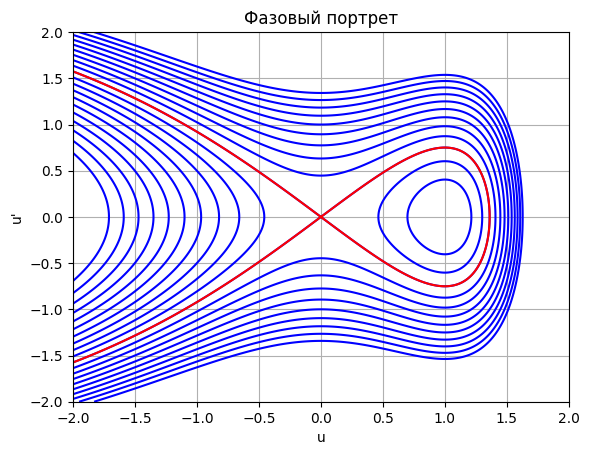

In [2]:
n = 1000
x = np.linspace(-2, 2, n)
y = np.linspace(-2, 2, n)
X, Y = np.meshgrid(x, y)

constants = np.arange(2, 4, 0.1)

for C in constants:
    Z = Y ** 2 / 2 + np.exp(X) * (X ** 2 - 3 * X + 3) - C
    plt.contour(X, Y, Z, [0], colors='b')

Z = Y ** 2 / 2 + np.exp(X) * (X ** 2 - 3 * X + 3) - 3
plt.contour(X, Y, Z, [0], colors='r')
plt.title("Фазовый портрет")
plt.xlabel("u")
plt.ylabel("u'")
plt.grid(True)

Можно заметить, что график симметричен относительно прямой $\dot{u} = 0$. Состояние равновесия будет на этой прямой.
Теперь рассмотрю первый интеграл при $\dot{u} = 0$, как функцию с параметром $C$. Можно заметить, что изменяя параметр $C$ можно получить разное количество решений у $H(u,\, 0) = C$. Мы имеем дело с бифуркацией. Для наглядности нарисую несколько графиков.

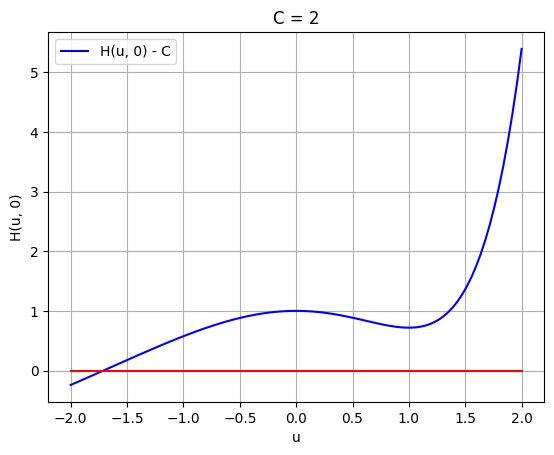

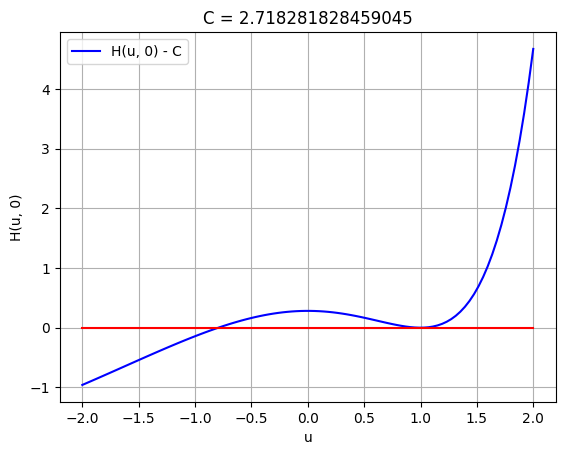

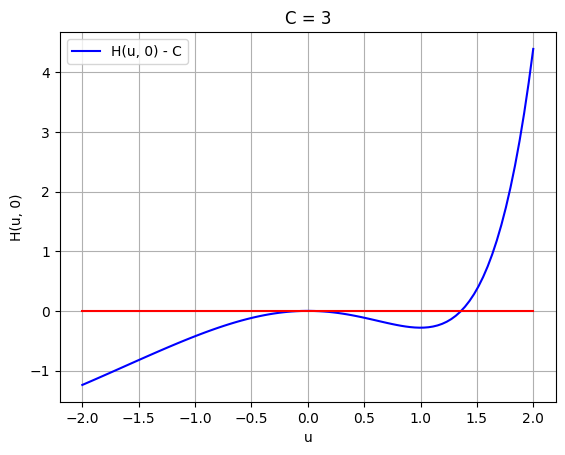

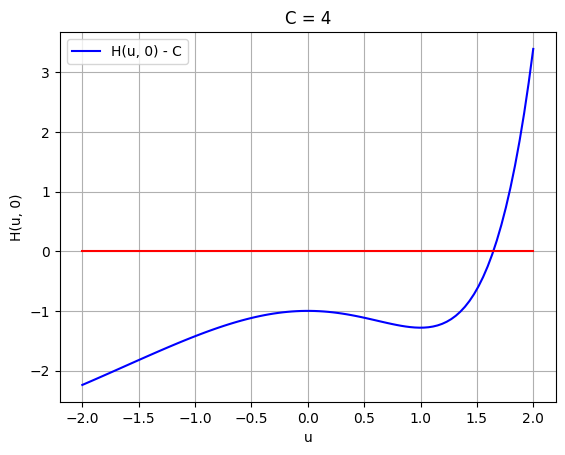

In [3]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-0.5, 1, 100)
H = lambda C: np.exp(x) * (x ** 2 - 3 * x + 3) - C

constants = [2, np.exp(1), 3, 4]
for C in constants:
    plt.figure()
    plt.plot(x, H(C), color="b", label="H(u, 0) - C")
    plt.plot(x, [0 for i in x], color="r")
    plt.legend()
    plt.title(f"C = {C}")
    plt.xlabel("u")
    plt.ylabel("H(u, 0)")
    plt.grid(True)

Бифуркационному значению $C = e$ соответствует состояние равновесия (типа центр).

Второе бифуркационное значение будет $C = 3$, которое соответствует сепаратрисе.

Периодическим решениям будут соответствовать константы между состоянием равновесия и сепаратрисой, то есть: $e < C < 3,\, u(t) > 0$

Какие-то решения будут при остальных значениях $C$: $C < e,\ \ \ \ \ \ e < C < 3,\, u(t) < 0,\ \ \ \ \ \ C > 3$

Сначала решим краевую задачу Дирихле $u(0) = u(\pi) = 0$. Из фазового портрета очевидно, что $\dot{u} > 0$.

In [4]:
def func(y, t):
    u, v = y
    dydt = [v, -u * (u - 1) * np.exp(u)]
    return dydt

# можно дихотомией, но лень
def best_index(arr, wanted_thing):
    index = 0
    for i in range(len(arr)):
        if abs(arr[i] - wanted_thing) < abs(arr[index] - wanted_thing):
            index = i
            if arr[i] - wanted_thing == 0:
                break
    return index

L = np.pi

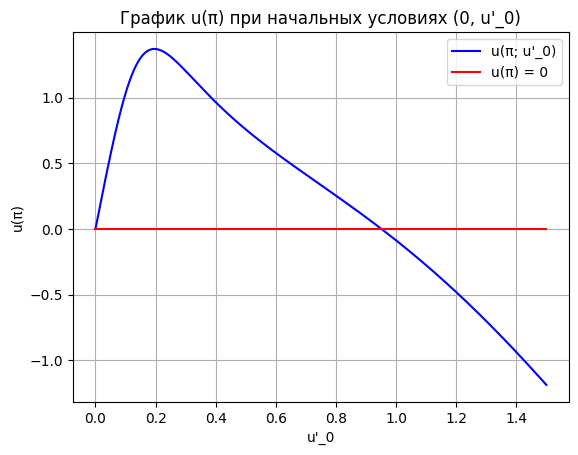

In [5]:
n = 1000

der_border = (0, 1.5)
time_border = (0, 6)

derivs = np.linspace(der_border[0], der_border[1], n + 1)
time = np.linspace(time_border[0], time_border[1], n + 1)

L_time_index = best_index(time, L)

func_values = []

for deriv in derivs:
    y0 = [0, deriv]
    sol = sc.integrate.odeint(func, y0, time)[:, 0]
    func_values.append(sol[L_time_index])

plt.plot(derivs, func_values, c='b', label='u(π; u\'_0)')
plt.xlabel("u'_0")
plt.ylabel("u(π)")
plt.title("График u(π) при начальных условиях (0, u'_0)")
plt.plot(der_border, [0, 0], c='r', label='u(π) = 0')
plt.legend()
plt.grid(True)

Видим два пересечения. Точка $u'_0 = 0$ соответствует тривиальному решению $u(t) = 0$. Вторая же точка интереснее и лежит на интервале $(0.8,\, 1)$. Найдем ее численно.

In [6]:
def dichotomy(func, interval):
    (left_index, right_index) = interval 
    if (func[left_index] * func[right_index] > 0):
        print("The same signs on ends of an interval!")
        return None
  
    iterations = 0
    mid_index = 0
    while (abs(left_index - right_index) > 1):
        before = (left_index, right_index)
        mid_index = int((left_index + right_index) / 2)
        iterations += 1
        if (func[left_index] * func[mid_index] <= 0):
            right_index = mid_index
        else:
            left_index = mid_index
            
        after = (left_index, right_index)
        if before == after:
            break

    return mid_index

In [7]:
left = best_index(derivs, 0.8)
right = best_index(derivs, 1)
wanted_deriv_index = dichotomy(func_values, (left, right))
print(f"u'_0 = {derivs[wanted_deriv_index]}")

u'_0 = 0.9510000000000001


Мы получили следующие начальные условия для задачи Коши:
$$u(0) = 0,\ \ \ \ \ \dot{u}(0) \approx 0.951$$

Тогда решение задачи Дирихле:

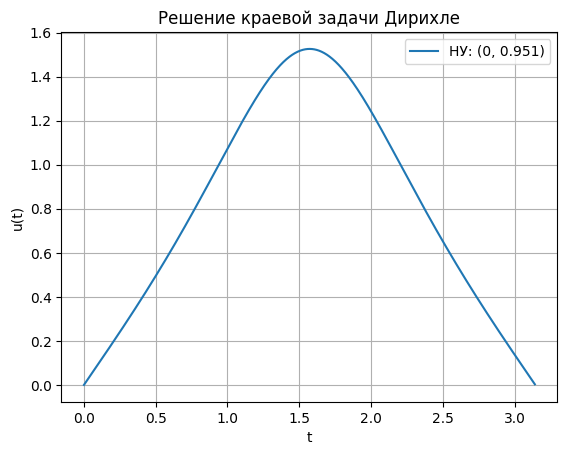

In [8]:
n = 1000

cauchy = (0, 0.951)
time_border = (0, L)
t = np.linspace(time_border[0], time_border[1], n + 1)
sol = sc.integrate.odeint(func, cauchy, t)[:, 0]
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title("Решение краевой задачи Дирихле")
plt.plot(t, sol, label=f'НУ: {cauchy}')
plt.legend()
plt.grid(True)

Теперь решим краевую периодическую задачу с периодом $L = 2\pi$. Для этого рассмотрим подробнее такие функции:
$$\Delta_1(L;\ u_0,\, u'_0) = u(L;\ u_0,\, u'_0) - u_0$$
$$\Delta_2(L;\ u_0,\, u'_0) = \dot{u}(L;\ u_0,\, u'_0) - u'_0$$

Каждой замкнутой кривой соответствует бесконечное количество решений с точностью до сдвига по $t$ (автономность). Также каждая замкнутая траектория "проходит" через $u'_0 = 0$, то есть существует такое $t_0$, что $u'(t_0) = 0$. В силу автономности можно положить, что $t_0 = 0$, то есть $u'(0) = 0$. С учетом этого, ранее введенные функции станут такими:
$$\Delta_1(L;\ u_0,\, 0) = u(L;\ u_0,\, 0) - u_0$$
$$\Delta_2(L;\ u_0,\, 0) = \dot{u}(L;\ u_0,\, 0)$$

Отсюда видно, что нули функции $\Delta_1(L;\ u_0,\, 0)$ будут соответствовать искомым периодическим решениям (и при этом должно выполняться $\Delta_2(L;\ u_0,\, 0)$ = 0, но это следует из существования первого интеграла и $\Delta_1(L;\ u_0,\, 0) = 0$).

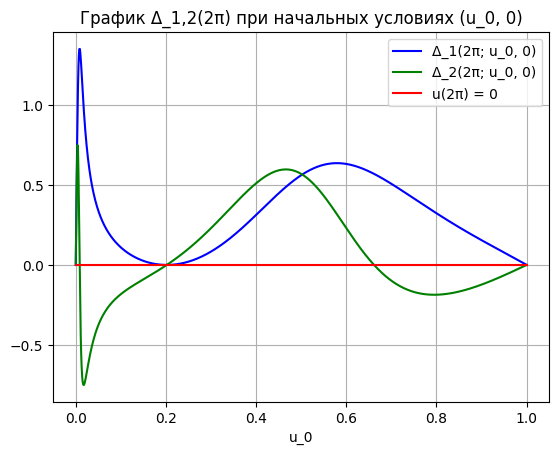

In [9]:
n = 1000
L = 2 * np.pi

u_border = (0, 1)
time_border = (0, 10)

u_values = np.linspace(u_border[0], u_border[1], n + 1)
time = np.linspace(time_border[0], time_border[1], n + 1)

L_time_index = best_index(time, L)

d1_values = []
d2_values = []

for u_value in u_values:
    y0 = [u_value, 0]
    sol = sc.integrate.odeint(func, y0, time)
    d1_values.append(sol[:, 0][L_time_index] - u_value)
    d2_values.append(sol[:, 1][L_time_index])

plt.plot(u_values, d1_values, c='b', label='Δ_1(2π; u_0, 0)')
plt.plot(u_values, d2_values, c='g', label='Δ_2(2π; u_0, 0)')
plt.xlabel("u_0")
plt.title("График Δ_1,2(2π) при начальных условиях (u_0, 0)")
plt.plot(u_border, [0, 0], c='r', label='u(2π) = 0')
plt.legend()
plt.grid(True)

На графике наблюдаются тривиальные решения $u(t) = 0$ и $u(t) = 1$. Помимо этого имеется некоторое решение при $u_0 \approx 0.2$ (уточню численно). Все, что можно найти при $u_0 > 1$ - это уже найденное решение, смещенное на $\frac{\pi}{2}$.

In [10]:
left = best_index(u_values, 0.18)
right = best_index(u_values, 0.22)
wanted_u_index = dichotomy(d2_values, (left, right))
print(f"u_0 = {u_values[wanted_u_index]}")

u_0 = 0.201


Мы получили следующие начальные условия для задачи Коши:
$$u(0) = 0.201,\ \ \ \ \ \dot{u}(0) = 0$$

Тогда решение периодической задачи:

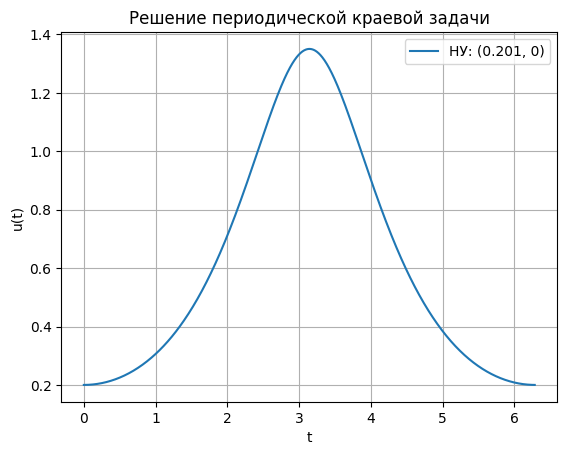

In [11]:
n = 1000

cauchy = (0.201, 0)
time_border = (0, L)
t = np.linspace(time_border[0], time_border[1], n + 1)
sol = sc.integrate.odeint(func, cauchy, t)[:, 0]
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title("Решение периодической краевой задачи")
plt.plot(t, sol, label=f'НУ: {cauchy}')
plt.legend()
plt.grid(True)